# 前提
このリポジトリ内のデータを準備するための手順を説明します


## センシング
### 対象
以下の3つを対象としている
- 歩く(walk)
- 座る(sit)
- 立ち止まる(stop)
- その他(other)
  - 行動の合間の動作など
- (不要)
  - センシング開始・終了時の動作
  - 機械学習には使わない

### 使用端末
Pixcel 6a

<img width=300px src="./images/phone.jpeg" />

### センシング方法
- ポケットに入れた
  - あえてポーチを使わずにやや揺れるポケットに入れた
  - ポケットはスマホがピッタり入るサイズ
- y軸正が鉛直上向き
- z軸正が内向き

<img width=500px src="./images/pocket.jpeg" />

### 動画
ラベリングのためにセンシング中の動画を撮影した

| データ名 | パス        | 動画                         | 説明                     |
| -------- | ----------- | ---------------------------- | ------------------------ |
| all      | ./data/all  | https://youtu.be/HEroefwHaj0 | 全ての行動を連続で行った |
| walk     | ./data/walk | https://youtu.be/j0OcIx1HWMY | 歩行のみを行った |


## ラベリング
[Label Studio](https://labelstud.io) を使用してラベリングを行った

### 初期設定
#### インストール
ここでは pip を使用した方法を紹介する

```shell
$ pip install label-studio
```

#### 起動
`label-studio` コマンドを使用して起動する

```shell
$ label-studio
```

#### サインイン
アカウントを作成し、サインインする(説明省略)

### ラベリングの準備
#### プロジェクトの作成
`Create Project` ボタンを押してプロジェクトを作成する
![project_create.png](./images/0-create-project.png)

プロジェクト名を入力する
![](./images/0-project-name.png)

`Labeling Setup` → `Video` → `Video Timeline Segmentation` を選択する
![](./images/0-labeling-setup.png)

初期のラベルを削除し，`walk`, `sit`, `stop` の3つを入力し `Add` ボタンを押す  
その後 `Save` ボタンを押す
![](./images/0-set-labels.png)


#### 動画の切り取り
QuickTime Player などでセンシング開始時が動画の0秒になるように動画を切り取る  
切り取らないと，Label Studio上の時間とデータ上の時間がずれてしまい後処理が面倒になる  


#### 動画のインポート
`Import` ボタンを押して，動画をドラッグ&ドロップする  
MOV形式のようにサポートされていない形式の場合，Youtubeにアップロード&ダウンロードすると良い  
ローカル上の動画ファイルを参照しているため，適切なディレクトリに入れておくと良い

![](./images/0-import-video.png)

`Import` ボタンを押す
![](./images/0-import.png)


### ラベリング
#### タスク(動画)の選択
`Label All Tasks` ボタンを押す  
個別にラベリングする場合はその欄をクリックする
![](./images/0-labeling-start.png)

#### ラベリング
ラベルをつけたい範囲をドラッグして選択し，ラベルを選択する  
![](./images/0-labeling.png)

最終的にこのようになる  
完了したら `Submit` ボタンを押す
![](./images/0-labeling-fin.png)

#### エクスポート
全て完了したら1つずつ選択し, `Export` → `JSON-MIN` を選択し, `Export` ボタンを押す  
ディレクトリごとに生データとラベリングデータをまとめるため, 1つずつエクスポートしている
![](./images/0-export.png)

エクスポートされたファイルを `data/*/labeling.json` として保存する

### ラベルの定義
[./data/labels.csv](./data/labels.csv) にラベル一覧を保存する  
今後の処理の都合上，全てのラベルがあると便利なため  
日本語の説明は処理中では使わないが，今後の参考のために記載している  
ラベリングでは `others` ラベルは使っていないが，その他の動作を表すために追加している

```csv
others,その他
walk,歩く
sit,座る
stop,立ち止まる
```


# 現状を確認


In [6]:
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
# データの読み込み
df_acc = pd.read_csv(
    "data/1/Accelerometer.csv", names=["time", "x", "y", "z"], header=1
)
# 角速度の読み込み
df_gyro = pd.read_csv(
    "data/1/Gyroscope.csv", names=["time", "x", "y", "z"], header=1
)


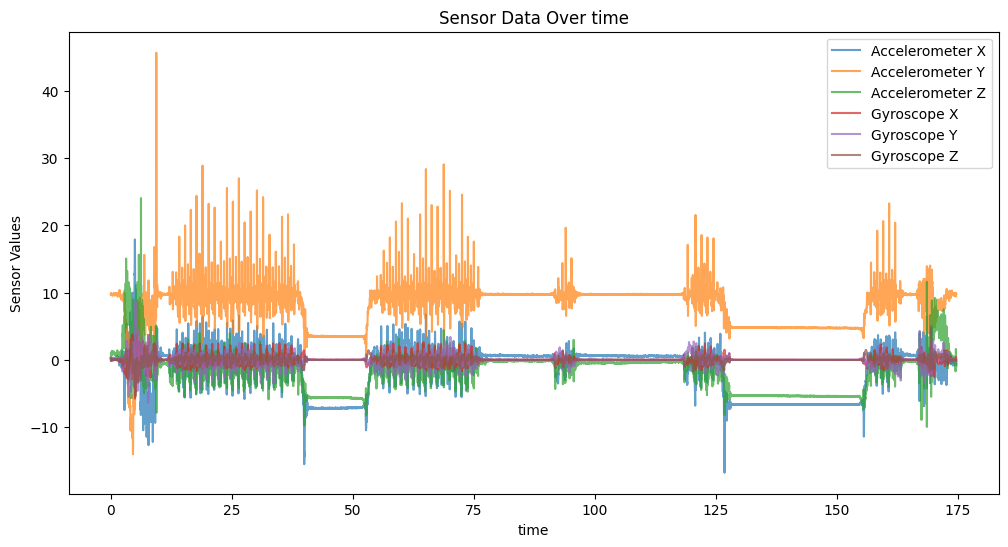

In [8]:
# プロット
plt.figure(figsize=(12, 6))
plt.plot(df_acc['time'], df_acc['x'], label='Accelerometer X', alpha=0.7)
plt.plot(df_acc['time'], df_acc['y'], label='Accelerometer Y', alpha=0.7)
plt.plot(df_acc['time'], df_acc['z'], label='Accelerometer Z', alpha=0.7)
plt.plot(df_gyro['time'], df_gyro['x'], label='Gyroscope X', alpha=0.7)
plt.plot(df_gyro['time'], df_gyro['y'], label='Gyroscope Y', alpha=0.7)
plt.plot(df_gyro['time'], df_gyro['z'], label='Gyroscope Z', alpha=0.7)
plt.xlabel('time')
plt.ylabel('Sensor Values')
plt.title('Sensor Data Over time')
plt.legend()